#IMPORTING SOME LIBRARIES

In [ ]:
import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV, RandomizedSearchCV
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
import seaborn as sns
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

#Loading Data

In [ ]:
df = pd.read_csv('/content/cancer dataset.csv')

In [ ]:
df.head()

,id,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,...,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst,Unnamed: 32
0,842302,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,...,17.33,184.60,2019.0,0.1622,0.6656,0.7119,0.2654,0.4601,0.11890,NaN
1,842517,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,...,23.41,158.80,1956.0,0.1238,0.1866,0.2416,0.1860,0.2750,0.08902,NaN
2,84300903,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,...,25.53,152.50,1709.0,0.1444,0.4245,0.4504,0.2430,0.3613,0.08758,NaN
3,84348301,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,...,26.50,98.87,567.7,0.2098,0.8663,0.6869,0.2575,0.6638,0.17300,NaN
4,84358402,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,...,16.67,152.20,1575.0,0.1374,0.2050,0.4000,0.1625,0.2364,0.07678,NaN


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 569 entries, 0 to 568
Data columns (total 33 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   id                       569 non-null    int64  
 1   diagnosis                569 non-null    object 
 2   radius_mean              569 non-null    float64
 3   texture_mean             569 non-null    float64
 4   perimeter_mean           569 non-null    float64
 5   area_mean                569 non-null    float64
 6   smoothness_mean          569 non-null    float64
 7   compactness_mean         569 non-null    float64
 8   concavity_mean           569 non-null    float64
 9   concave points_mean      569 non-null    float64
 10  symmetry_mean            569 non-null    float64
 11  fractal_dimension_mean   569 non-null    float64
 12  radius_se                569 non-null    float64
 13  texture_se               569 non-null    float64
 14  perimeter_se             5

In [ ]:
df = df.drop(['id','Unnamed: 32'], axis = 'columns')

In [ ]:
df

,diagnosis,radius_mean,texture_mean,perimeter_mean,area_mean,smoothness_mean,compactness_mean,concavity_mean,concave points_mean,symmetry_mean,...,radius_worst,texture_worst,perimeter_worst,area_worst,smoothness_worst,compactness_worst,concavity_worst,concave points_worst,symmetry_worst,fractal_dimension_worst
0,M,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.30010,0.14710,0.2419,...,25.380,17.33,184.60,2019.0,0.16220,0.66560,0.7119,0.2654,0.4601,0.11890
1,M,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.08690,0.07017,0.1812,...,24.990,23.41,158.80,1956.0,0.12380,0.18660,0.2416,0.1860,0.2750,0.08902
2,M,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.19740,0.12790,0.2069,...,23.570,25.53,152.50,1709.0,0.14440,0.42450,0.4504,0.2430,0.3613,0.08758
3,M,11.42,20.38,77.58,386.1,0.14250,0.28390,0.24140,0.10520,0.2597,...,14.910,26.50,98.87,567.7,0.20980,0.86630,0.6869,0.2575,0.6638,0.17300
4,M,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.19800,0.10430,0.1809,...,22.540,16.67,152.20,1575.0,0.13740,0.20500,0.4000,0.1625,0.2364,0.07678
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
564,M,21.56,22.39,142.00,1479.0,0.11100,0.11590,0.24390,0.13890,0.1726,...,25.450,26.40,166.10,2027.0,0.14100,0.21130,0.4107,0.2216,0.2060,0.07115
565,M,20.13,28.25,131.20,1261.0,0.09780,0.10340,0.14400,0.09791,0.1752,...,23.690,38.25,155.00,1731.0,0.11660,0.19220,0.3215,0.1628,0.2572,0.06637
566,M,16.60,28.08,108.30,858.1,0.08455,0.10230,0.09251,0.05302,0.1590,...,18.980,34.12,126.70,1124.0,0.11390,0.30940,0.3403,0.1418,0.2218,0.07820
567,M,20.60,29.33,140.10,1265.0,0.11780,0.27700,0.35140,0.15200,0.2397,...,25.740,39.42,184.60,1821.0,0.16500,0.86810,0.9387,0.2650,0.4087,0.12400


In [ ]:
df.diagnosis.value_counts()

,count
diagnosis,
B,357
M,212


#EDA

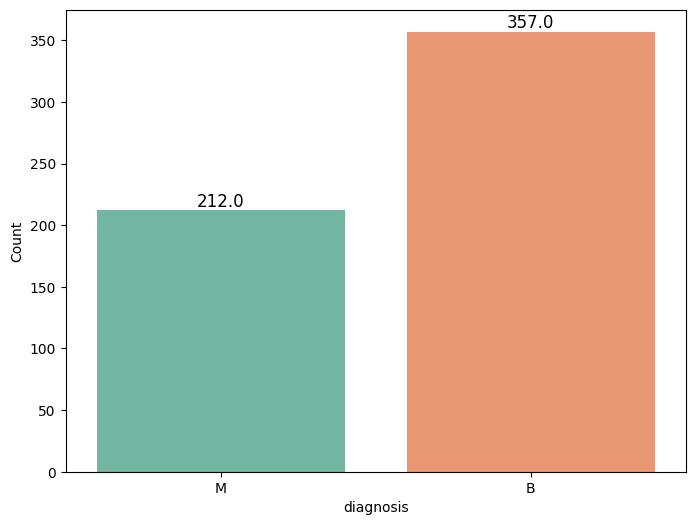

In [ ]:
# Create the countplot
plt.figure(figsize=(8, 6))
ax = sns.countplot(x='diagnosis', data=df, palette='Set2')

# Annotate the bars with their respective counts
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height}', (p.get_x() + p.get_width() / 2, height), ha='center', va='bottom', fontsize=12)

# Optionally, you can set the y-axis label
plt.ylabel('Count')

# Show the plot
plt.show()


#Separate features and target coloms

In [ ]:
x = df.drop('diagnosis',axis=1)
y = df[['diagnosis']]

# Train Test Split

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(x,y, random_state=42, test_size=.30)

In [ ]:
ytest

,diagnosis
204,B
70,M
131,M
431,B
540,B
...,...
69,B
542,B
176,B
501,M


In [ ]:
ytest.shape

(171, 1)

In [ ]:
xtest.shape

(171, 30)

#Model Implementation

#Decision Tree

In [ ]:
dt_model = DecisionTreeClassifier(random_state=1)
dt_model.fit(xtrain, ytrain)
y_pred_dt = dt_model.predict(xtest)

In [ ]:
y_pred_dt

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'B', 'B', 'M', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'M', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'M', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'M', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

**Evaluate Decision Tree model performance**

In [ ]:
print("Decision Tree Model Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_dt), '\n')
print("Classification Report:")
print(classification_report(ytest, y_pred_dt))

Decision Tree Model Performance:
Accuracy: 0.935672514619883 

Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.94      0.95       108
           M       0.89      0.94      0.91        63

    accuracy                           0.94       171
   macro avg       0.93      0.94      0.93       171
weighted avg       0.94      0.94      0.94       171



#Random Forest

In [ ]:
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(xtrain, ytrain)
y_pred_rf = rf_model.predict(xtest)

In [ ]:
y_pred_rf

array(['B', 'M', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'B', 'B', 'M', 'B',
       'M', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'B', 'M',
       'B', 'B', 'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'M', 'M',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'B',
       'B', 'M', 'M', 'B', 'B', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B',
       'B', 'B', 'M', 'B', 'B', 'M', 'M', 'M', 'M', 'M', 'B', 'B', 'B',
       'B', 'B', 'B', 'B', 'B', 'M', 'M', 'B', 'M', 'M', 'B', 'M', 'M',
       'B', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'M', 'B', 'B', 'M',
       'M', 'M', 'B', 'B', 'B', 'M', 'B', 'B', 'B', 'M', 'B', 'M', 'B',
       'B', 'M', 'B', 'M', 'M', 'M', 'B', 'M', 'B', 'B', 'B', 'B', 'M',
       'M', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B', 'B',
       'M', 'B'], dtype=object)

**Evaluate Random Forest model performance**

In [ ]:
print("\nRandom Forest Model Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_rf), '\n')
print("Classification Report:")
print(classification_report(ytest, y_pred_rf))


Random Forest Model Performance:
Accuracy: 0.9707602339181286 

Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



**Final Result Comparison of DT & RF**

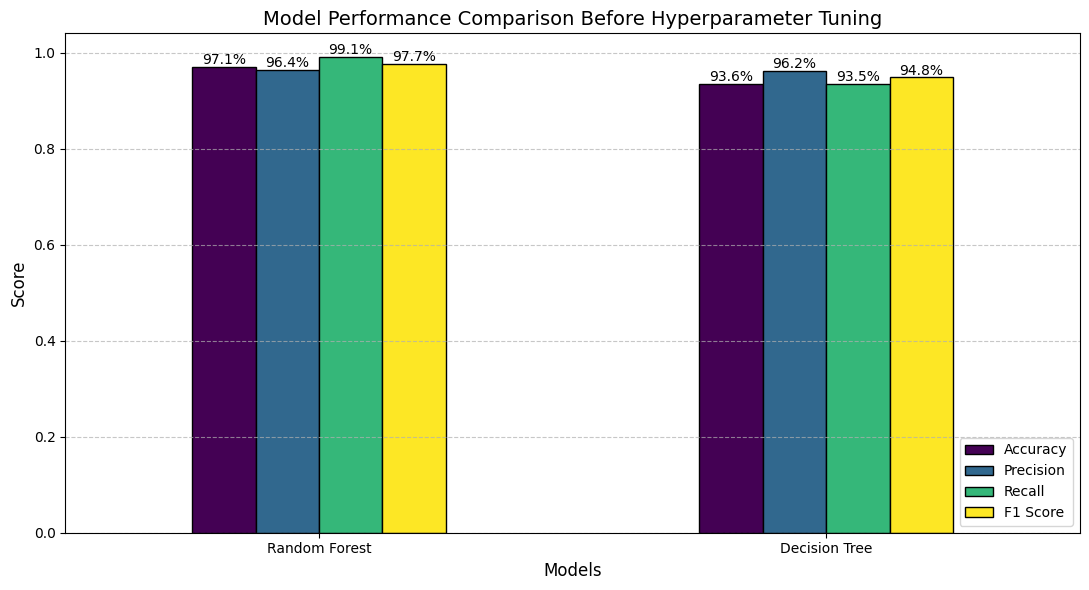

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Store model names
models = ["Random Forest", "Decision Tree"]

# Compute metrics
metrics = {
    "Accuracy": [
        accuracy_score(ytest, y_pred_rf),
        accuracy_score(ytest, y_pred_dt)
    ],
    "Precision": [
        precision_score(ytest, y_pred_rf, pos_label="B"),
        precision_score(ytest, y_pred_dt, pos_label="B")
    ],
    "Recall": [
        recall_score(ytest, y_pred_rf, pos_label="B"),
        recall_score(ytest, y_pred_dt, pos_label="B")
    ],
    "F1 Score": [
        f1_score(ytest, y_pred_rf, pos_label="B"),
        f1_score(ytest, y_pred_dt, pos_label="B")
    ]
}

# Convert dictionary to DataFrame
df_metrics = pd.DataFrame(metrics, index=models)

# Plot bar chart with explicit figure size adjustment
fig, ax = plt.subplots(figsize=(11, 6))  # Create a larger figure with width=14, height=10
df_metrics.plot(kind="bar", colormap="viridis", edgecolor="black", ax=ax)

# Title and labels
plt.title("Model Performance Comparison Before Hyperparameter Tuning", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Score", fontsize=12)

# Set grid, legend, and x-tick rotation
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show percentage values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                xytext=(0, 5), textcoords='offset points', ha='center', va='center')

# Adjust layout to ensure everything fits nicely
plt.tight_layout()

# Show the plot
plt.show()


# Hyperparameter optimization using Grid and Randomized Search

# Initialized Hyperparameters

In [ ]:
# Define hyperparameters for Decision Tree
dt_params = {
    'criterion': ['gini', 'entropy'],
    'splitter': ['best', 'random'],
    'max_depth': [None, 2,4,6,8,10,15,20,25,28,30],
    'min_samples_split': [1,2,3,4,5,6,7,8],
    'min_samples_leaf': [1,2,3,4,5]
}

#Define hyperparameters for Random Forest
rf_params = {
    'n_estimators': [101, 125, 151, 175, 201, 251, 300],
    'criterion': ['gini', 'entropy'],
    'max_depth': [None, 2,4,6,8,10,15,20,25,28],
    'min_samples_split': [2,3,4,5,6,7,8,10],
    'min_samples_leaf': [1, 2,3, 4],
    'max_features': ['auto', 'sqrt', 'log2']
}


# Perform Grid Search for Decision Tree

In [ ]:
# Perform Grid Search for Decision Tree
dt_grid_search = GridSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                              param_grid=dt_params, cv=5)
dt_grid_search.fit(xtrain, ytrain)

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [None, 2, 4, 6, 8, 10, 15, 20, 25, 28,
                                       30],
                         'min_samples_leaf': [1, 2, 3, 4, 5],
                         'min_samples_split': [1, 2, 3, 4, 5, 6, 7, 8],
                         'splitter': ['best', 'random']})

In [ ]:
dt_grid_search.cv_results_

{'mean_fit_time': array([0.00131259, 0.00105143, 0.01059322, ..., 0.00484648, 0.00823159,
        0.00380716]),
 'std_fit_time': array([2.86510677e-04, 4.43707161e-05, 1.43914396e-03, ...,
        1.00321128e-03, 4.10259823e-04, 2.73104776e-04]),
 'mean_score_time': array([0.        , 0.        , 0.00473714, ..., 0.00449076, 0.00364046,
        0.00347748]),
 'std_score_time': array([0.00000000e+00, 0.00000000e+00, 4.43345820e-04, ...,
        8.33074646e-04, 9.36278472e-05, 2.33245255e-04]),
 'param_criterion': masked_array(data=['gini', 'gini', 'gini', ..., 'entropy', 'entropy',
                    'entropy'],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_max_depth': masked_array(data=[None, None, None, ..., 30, 30, 30],
              mask=[False, False, False, ..., False, False, False],
        fill_value='?',
             dtype=object),
 'param_min_samples_leaf': masked_array(data=[1, 1, 1, ..., 5, 5,

In [ ]:
tuning_result_dt_gs = pd.DataFrame(dt_grid_search.cv_results_)
tuning_result_dt_gs.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_criterion,param_max_depth,param_min_samples_leaf,param_min_samples_split,param_splitter,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.001313,0.000287,0.000000,0.000000,gini,None,1,1,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1541
1,0.001051,0.000044,0.000000,0.000000,gini,None,1,1,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,1541
2,0.010593,0.001439,0.004737,0.000443,gini,None,1,2,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9125,0.8875,0.9000,0.936709,0.911392,0.909620,0.016292,1184
3,0.005396,0.000755,0.005556,0.001024,gini,None,1,2,random,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9375,0.9000,0.9625,0.911392,0.949367,0.932152,0.023284,236
4,0.010123,0.001422,0.004727,0.000376,gini,None,1,3,best,"{'criterion': 'gini', 'max_depth': None, 'min_...",0.9125,0.8875,0.9000,0.936709,0.911392,0.909620,0.016292,1184


In [ ]:
tuning_result_dt_gs.shape

(1760, 18)

In [ ]:
dt_grid_search.best_params_ #clf = dt_grid_search.best_params_

{'criterion': 'entropy',
 'max_depth': 4,
 'min_samples_leaf': 2,
 'min_samples_split': 2,
 'splitter': 'best'}

**Evaluate the optimized DT model for Grid Search**

In [ ]:
# Decision Tree and Grid Search
y_pred_dt_gs = dt_grid_search.predict(xtest)
print("\nDecision Tree Grid Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_dt_gs))
print("Classification Report:")
print(classification_report(ytest, y_pred_dt_gs))


Decision Tree Grid Search Performance:
Accuracy: 0.9532163742690059
Classification Report:
              precision    recall  f1-score   support

           B       0.95      0.98      0.96       108
           M       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



# Perform Grid Search for Random Forest

In [ ]:
rf_grid_search = GridSearchCV(estimator=RandomForestClassifier(random_state=42),
                              param_grid=rf_params, cv=5)
rf_grid_search.fit(xtrain, ytrain)

In [ ]:
rf_grid_search.cv_results_

In [ ]:
tuning_result_rf_gs = pd.DataFrame(rf_grid_search.cv_results_)
tuning_result_rf_gs.head()

In [ ]:
tuning_result_rf_gs.shape

In [ ]:
rf_grid_search.best_params_ #clf = rf_grid_search.best_params_

**Evaluate the optimized RF models for Grid Search**

In [ ]:
# Random Forest Grid Search
y_pred_rf_gs = rf_grid_search.predict(xtest)
print("\nRandom Forest Grid Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_rf_gs))
print("Classification Report:")
print(classification_report(ytest, y_pred_rf_gs))

**Final Performance Comparison of DT & RF with Grid Search Optimization**

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Store model names
models = ["Random Forest", "Decision Tree"]

# Compute metrics
metrics = {
    "Accuracy": [
        accuracy_score(ytest, y_pred_rf_gs),
        accuracy_score(ytest, y_pred_dt_gs)
    ],
    "Precision": [
        precision_score(ytest, y_pred_rf_gs, pos_label="B"),
        precision_score(ytest, y_pred_dt_gs, pos_label="B")
    ],
    "Recall": [
        recall_score(ytest, y_pred_rf_gs, pos_label="B"),
        recall_score(ytest, y_pred_dt_gs, pos_label="B")
    ],
    "F1 Score": [
        f1_score(ytest, y_pred_rf_gs, pos_label="B"),
        f1_score(ytest, y_pred_dt_gs, pos_label="B")
    ]
}

# Convert dictionary to DataFrame
df_metrics = pd.DataFrame(metrics, index=models)

# Plot bar chart with explicit figure size adjustment
fig, ax = plt.subplots(figsize=(11, 6))  # Create a larger figure with width=14, height=10
df_metrics.plot(kind="bar", colormap="viridis", edgecolor="black", ax=ax)

# Title and labels
plt.title("Model Performance Comparison After Hyperparameter Tuning using Grid Search ", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Score", fontsize=12)

# Set grid, legend, and x-tick rotation
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show percentage values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                xytext=(0, 5), textcoords='offset points', ha='center', va='center')

# Adjust layout to ensure everything fits nicely
plt.tight_layout()

# Show the plot
plt.show()


# Perform Randomized Search for Decision Tree

In [ ]:
# Perform Randomized Search for Decision Tree
dt_randomized_search = RandomizedSearchCV(estimator=DecisionTreeClassifier(random_state=42),
                                      param_distributions=dt_params, n_iter=100, cv=5, random_state=42)
dt_randomized_search.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 2, 4, 6, 8, 10, 15,
                                                      20, 25, 28, 30],
                                        'min_samples_leaf': [1, 2, 3, 4, 5],
                                        'min_samples_split': [1, 2, 3, 4, 5, 6,
                                                              7, 8],
                                        'splitter': ['best', 'random']},
                   random_state=42)

In [ ]:
dt_randomized_search.cv_results_

{'mean_fit_time': array([0.00437779, 0.0066442 , 0.00380592, 0.00371532, 0.00884681,
        0.00679812, 0.00929627, 0.00915461, 0.00947247, 0.00464425,
        0.00872436, 0.00356293, 0.00895867, 0.00386481, 0.00755033,
        0.01033626, 0.00402594, 0.00365458, 0.008887  , 0.00890613,
        0.00441146, 0.00950823, 0.00410423, 0.00916119, 0.00423341,
        0.00848355, 0.00877528, 0.00502396, 0.00064812, 0.00801153,
        0.00065088, 0.00357919, 0.00369587, 0.00828547, 0.00842214,
        0.00376592, 0.0040503 , 0.00345106, 0.00876937, 0.00358114,
        0.00391746, 0.00084195, 0.00805068, 0.0037076 , 0.00667987,
        0.0038651 , 0.00855904, 0.00369434, 0.00365233, 0.00800385,
        0.01015449, 0.00070729, 0.00817451, 0.0035862 , 0.00905776,
        0.00972018, 0.00943494, 0.00433764, 0.00997162, 0.00979314,
        0.00397944, 0.00893364, 0.00936084, 0.0042995 , 0.01008859,
        0.00444732, 0.00936465, 0.0040031 , 0.00581369, 0.00085502,
        0.00869465, 0.00069447,

In [ ]:
tuning_result_dt_rs = pd.DataFrame(dt_randomized_search.cv_results_)
tuning_result_dt_rs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_splitter,param_min_samples_split,param_min_samples_leaf,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.004378,0.001066,0.003600,0.000188,random,3,1,6,entropy,"{'splitter': 'random', 'min_samples_split': 3,...",0.9500,0.8875,0.9250,0.924051,0.898734,0.917057,0.021939,58
1,0.006644,0.000111,0.003729,0.000213,best,4,5,2,entropy,"{'splitter': 'best', 'min_samples_split': 4, '...",0.9375,0.8875,0.9000,0.911392,0.949367,0.917152,0.023058,53
2,0.003806,0.000299,0.003558,0.000136,random,2,1,30,entropy,"{'splitter': 'random', 'min_samples_split': 2,...",0.9250,0.8875,0.9250,0.962025,0.911392,0.922184,0.024177,38
3,0.003715,0.000200,0.003395,0.000191,random,3,2,25,entropy,"{'splitter': 'random', 'min_samples_split': 3,...",0.9375,0.8875,0.8875,0.936709,0.873418,0.904525,0.027094,73
4,0.008847,0.000683,0.003927,0.000299,best,5,2,8,gini,"{'splitter': 'best', 'min_samples_split': 5, '...",0.9125,0.9125,0.9375,0.949367,0.924051,0.927184,0.014419,29
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.003491,0.000131,0.003282,0.000104,random,3,4,8,entropy,"{'splitter': 'random', 'min_samples_split': 3,...",0.9125,0.8750,0.9625,0.949367,0.936709,0.927215,0.030883,23
96,0.008427,0.000342,0.003781,0.000210,best,3,4,None,entropy,"{'splitter': 'best', 'min_samples_split': 3, '...",0.9500,0.8875,0.9625,0.949367,0.924051,0.934684,0.026696,1
97,0.008110,0.000367,0.003681,0.000195,best,6,4,None,entropy,"{'splitter': 'best', 'min_samples_split': 6, '...",0.9500,0.8875,0.9625,0.949367,0.924051,0.934684,0.026696,1
98,0.003788,0.000134,0.003609,0.000320,random,4,3,20,gini,"{'splitter': 'random', 'min_samples_split': 4,...",0.9250,0.8875,0.9625,0.949367,0.911392,0.927152,0.026714,32


In [ ]:
dt_randomized_search.best_params_

{'splitter': 'best',
 'min_samples_split': 3,
 'min_samples_leaf': 2,
 'max_depth': 8,
 'criterion': 'entropy'}

**Evaluate the optimized DT models for Randomized Search**

In [ ]:
y_pred_dt_rs = dt_randomized_search.predict(xtest)
print("\n Decision Tree Randomized Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_dt_rs))
print("Classification Report:")
print(classification_report(ytest, y_pred_dt_rs))


 Decision Tree Randomized Search Performance:
Accuracy: 0.9532163742690059
Classification Report:
              precision    recall  f1-score   support

           B       0.95      0.98      0.96       108
           M       0.97      0.90      0.93        63

    accuracy                           0.95       171
   macro avg       0.96      0.94      0.95       171
weighted avg       0.95      0.95      0.95       171



# Perform Randomized Search for Random Forest

In [ ]:
rf_randomized_search = RandomizedSearchCV(estimator=RandomForestClassifier(random_state=42),
                                      param_distributions=rf_params, n_iter=100, cv=5, random_state=42)
rf_randomized_search.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
                   n_iter=100,
                   param_distributions={'criterion': ['gini', 'entropy'],
                                        'max_depth': [None, 2, 4, 6, 8, 10, 15,
                                                      20, 25, 28],
                                        'max_features': ['auto', 'sqrt',
                                                         'log2'],
                                        'min_samples_leaf': [1, 2, 3, 4],
                                        'min_samples_split': [2, 3, 4, 5, 6, 7,
                                                              8, 10],
                                        'n_estimators': [101, 125, 151, 175,
                                                         201, 251, 300]},
                   random_state=42)

In [ ]:
rf_randomized_search.cv_results_
tuning_result_rf_rs = pd.DataFrame(rf_randomized_search.cv_results_)
tuning_result_rf_rs

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_n_estimators,param_min_samples_split,param_min_samples_leaf,param_max_features,param_max_depth,param_criterion,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
0,0.404612,0.008331,0.022942,0.005603,201,8,2,log2,None,entropy,"{'n_estimators': 201, 'min_samples_split': 8, ...",0.9750,0.9500,0.9625,0.936709,0.924051,0.949652,0.018059,38
1,0.000878,0.000159,0.000000,0.000000,300,4,4,auto,2,gini,"{'n_estimators': 300, 'min_samples_split': 4, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,66
2,0.000738,0.000009,0.000000,0.000000,101,4,1,auto,25,gini,"{'n_estimators': 101, 'min_samples_split': 4, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,66
3,0.819459,0.224814,0.045972,0.032169,300,6,4,log2,28,entropy,"{'n_estimators': 300, 'min_samples_split': 6, ...",0.9625,0.9500,0.9625,0.936709,0.949367,0.952215,0.009644,24
4,0.443642,0.114170,0.019568,0.002908,201,7,1,log2,20,gini,"{'n_estimators': 201, 'min_samples_split': 7, ...",0.9250,0.9500,0.9625,0.949367,0.936709,0.944715,0.012796,50
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,0.736725,0.122955,0.033975,0.006239,300,3,1,sqrt,2,entropy,"{'n_estimators': 300, 'min_samples_split': 3, ...",0.9375,0.9250,0.9500,0.936709,0.936709,0.937184,0.007915,57
96,0.586283,0.012564,0.023943,0.000629,300,2,3,log2,20,entropy,"{'n_estimators': 300, 'min_samples_split': 2, ...",0.9625,0.9500,0.9625,0.949367,0.936709,0.952215,0.009644,26
97,0.000765,0.000083,0.000000,0.000000,175,2,2,auto,8,entropy,"{'n_estimators': 175, 'min_samples_split': 2, ...",NaN,NaN,NaN,NaN,NaN,NaN,NaN,66
98,0.219044,0.008078,0.013351,0.001544,125,3,3,sqrt,2,gini,"{'n_estimators': 125, 'min_samples_split': 3, ...",0.9375,0.9125,0.9250,0.936709,0.936709,0.929684,0.009767,63


In [ ]:
rf_randomized_search.best_params_

{'n_estimators': 251,
 'min_samples_split': 2,
 'min_samples_leaf': 1,
 'max_features': 'sqrt',
 'max_depth': None,
 'criterion': 'entropy'}

**Evaluate the optimized RF models for Randomized Search**

In [ ]:
y_pred_rf_rs = rf_randomized_search.predict(xtest)
print("\n Random Forest Randomized Search Performance:")
print("Accuracy:", accuracy_score(ytest, y_pred_rf_rs))
print("Classification Report:")
print(classification_report(ytest, y_pred_rf_rs))


 Random Forest Randomized Search Performance:
Accuracy: 0.9707602339181286
Classification Report:
              precision    recall  f1-score   support

           B       0.96      0.99      0.98       108
           M       0.98      0.94      0.96        63

    accuracy                           0.97       171
   macro avg       0.97      0.96      0.97       171
weighted avg       0.97      0.97      0.97       171



**Final Performance Comparison of DT & RF with Randomized Search Optimization**

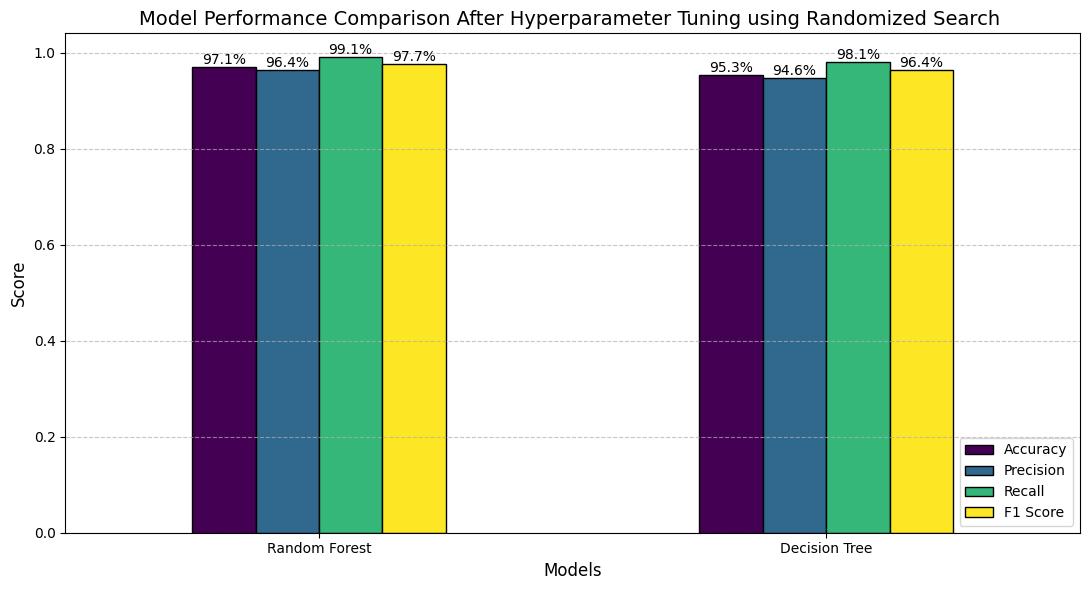

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Store model names
models = ["Random Forest", "Decision Tree"]

# Compute metrics
metrics = {
    "Accuracy": [
        accuracy_score(ytest, y_pred_rf_rs),
        accuracy_score(ytest, y_pred_dt_rs)
    ],
    "Precision": [
        precision_score(ytest, y_pred_rf_rs, pos_label="B"),
        precision_score(ytest, y_pred_dt_rs, pos_label="B")
    ],
    "Recall": [
        recall_score(ytest, y_pred_rf_rs, pos_label="B"),
        recall_score(ytest, y_pred_dt_rs, pos_label="B")
    ],
    "F1 Score": [
        f1_score(ytest, y_pred_rf_rs, pos_label="B"),
        f1_score(ytest, y_pred_dt_rs, pos_label="B")
    ]
}

# Convert dictionary to DataFrame
df_metrics = pd.DataFrame(metrics, index=models)

# Plot bar chart with explicit figure size adjustment
fig, ax = plt.subplots(figsize=(11, 6))  # Create a larger figure with width=14, height=10
df_metrics.plot(kind="bar", colormap="viridis", edgecolor="black", ax=ax)

# Title and labels
plt.title("Model Performance Comparison After Hyperparameter Tuning using Randomized Search ", fontsize=14)
plt.xlabel("Models", fontsize=12)
plt.ylabel("Score", fontsize=12)

# Set grid, legend, and x-tick rotation
plt.xticks(rotation=0)
plt.legend(loc="lower right")
plt.grid(axis="y", linestyle="--", alpha=0.7)

# Show percentage values on the bars
for p in ax.patches:
    ax.annotate(f'{p.get_height()*100:.1f}%', (p.get_x() + p.get_width() / 2., p.get_height()),
                xytext=(0, 5), textcoords='offset points', ha='center', va='center')

# Adjust layout to ensure everything fits nicely
plt.tight_layout()

# Show the plot
plt.show()


# Post Pruning for Decision Tree

In [ ]:
dt_clf = dt_randomized_search.best_estimator_
dt_clf

DecisionTreeClassifier(criterion='entropy', max_depth=8, min_samples_leaf=2,
                       min_samples_split=3, random_state=42)

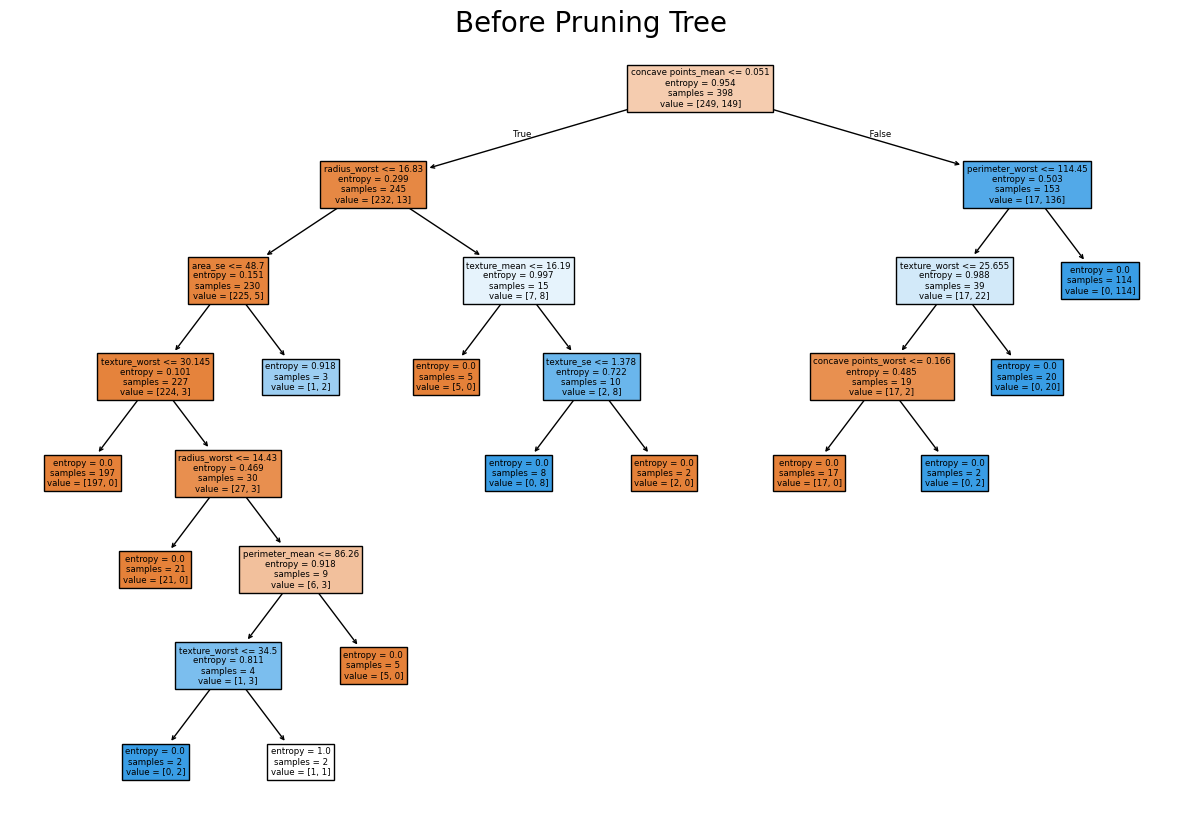

In [ ]:
from sklearn import tree
plt.figure(figsize=(15,10))
tree.plot_tree(dt_clf, filled=True, feature_names = x.columns)
plt.title("Before Pruning Tree", fontsize=20)
plt.show()

Read: #https://scikit-learn.org/stable/auto_examples/tree/plot_cost_complexity_pruning.html

In [ ]:
pruning_path = dt_clf.cost_complexity_pruning_path(xtrain, ytrain) # dt_clf = DecisionTreeClassifier #cost_complexity_pruning_pat(CCP Value)
ccp_alpha_values = pruning_path.ccp_alphas

In [ ]:
ccp_alpha_values

array([0.        , 0.00312842, 0.01261193, 0.01458594, 0.0181389 ,
       0.01942863, 0.02249811, 0.02254598, 0.02317526, 0.05933369,
       0.07364967, 0.0966387 , 0.57628768])

In [ ]:
clfs_list = []  # save diffrent classifiers
for ccp in ccp_alpha_values:
    clf = DecisionTreeClassifier(random_state=42, ccp_alpha=ccp)
    clf.fit(xtrain, ytrain)
    clfs_list.append(clf)

In [ ]:
clfs_list

[DecisionTreeClassifier(random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.00312842336139832, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.012611934695110238, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.014585942967809122, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.01813889685646639, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.019428626961936996, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.022498112473096667, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.0225459777507582, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.023175262447669234, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.059333693848085844, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.073649668769294, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.09663869999075987, random_state=42),
 DecisionTreeClassifier(ccp_alpha=0.5762876765620236, random_state=42)]

In [ ]:
train_scores = [ clf.score(xtrain, ytrain) for clf in clfs_list ]
test_scores = [ clf.score(xtest, ytest) for clf in clfs_list ]

In [ ]:
train_scores

[1.0,
 0.9949748743718593,
 0.9698492462311558,
 0.9597989949748744,
 0.9422110552763819,
 0.9396984924623115,
 0.9396984924623115,
 0.9396984924623115,
 0.9396984924623115,
 0.9246231155778895,
 0.9246231155778895,
 0.9246231155778895,
 0.6256281407035176]

In [ ]:
test_scores

[0.9415204678362573,
 0.9590643274853801,
 0.9590643274853801,
 0.9415204678362573,
 0.9298245614035088,
 0.9064327485380117,
 0.9064327485380117,
 0.9064327485380117,
 0.9064327485380117,
 0.8947368421052632,
 0.8947368421052632,
 0.8947368421052632,
 0.631578947368421]

In [ ]:
import matplotlib.pyplot as plt

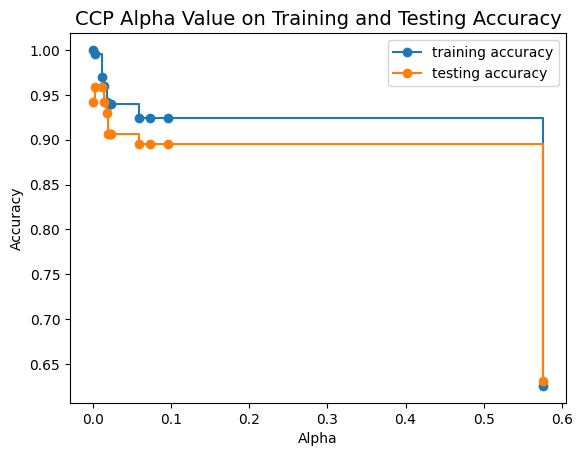

In [ ]:
fig, ax = plt.subplots()
ax.set_xlabel("Alpha")
ax.set_ylabel("Accuracy")

ax.plot(ccp_alpha_values, train_scores, marker='o', label="training accuracy", drawstyle="steps-post")
ax.plot(ccp_alpha_values, test_scores, marker='o', label="testing accuracy", drawstyle="steps-post")
plt.title("CCP Alpha Value on Training and Testing Accuracy", fontsize=14)

ax.legend()

In [ ]:
clf = DecisionTreeClassifier(random_state=42, ccp_alpha=0.005)
clf.fit(xtrain, ytrain)

DecisionTreeClassifier(ccp_alpha=0.005, random_state=42)

In [ ]:
pred = clf.predict(xtest)
accuracy_score(ytest, pred)

0.9649122807017544

In [ ]:
clf.score(xtrain, ytrain)

0.9899497487437185

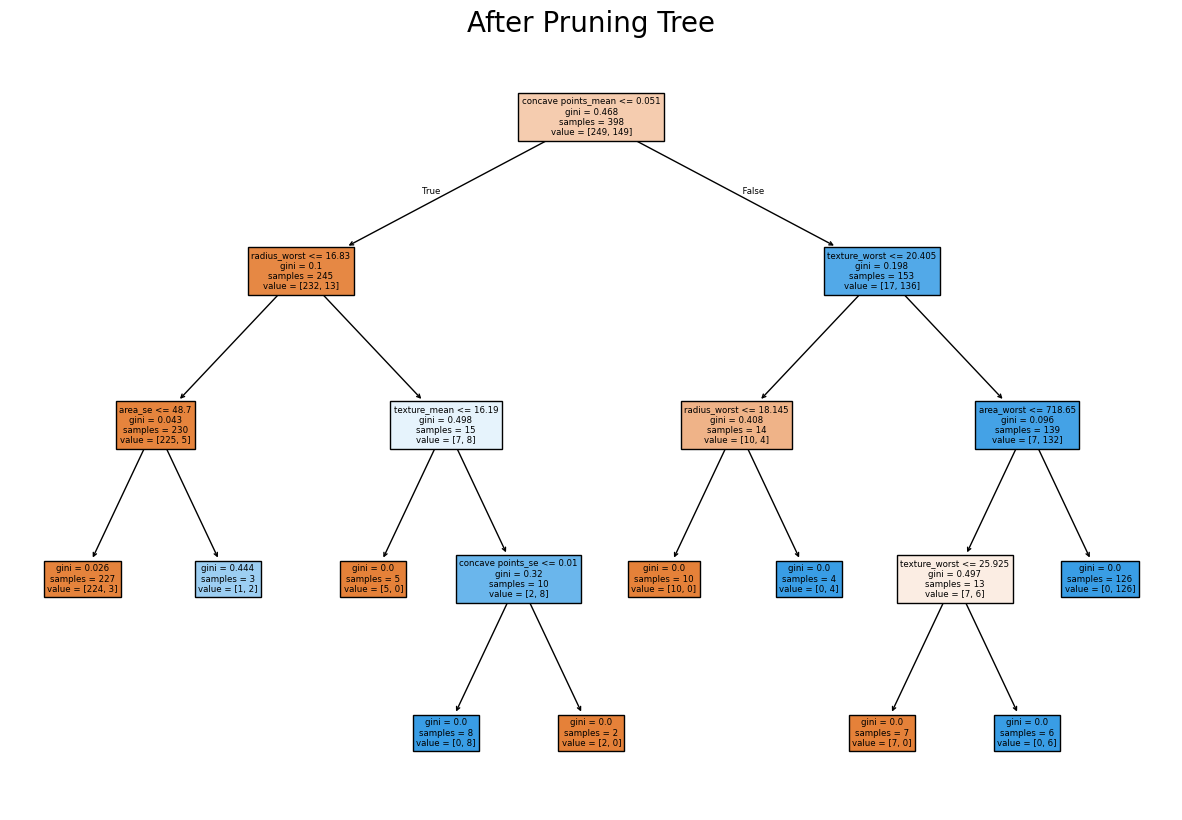

In [ ]:
plt.figure(figsize=(15,10))
tree.plot_tree(clf, filled=True, feature_names=x.columns)
plt.title("After Pruning Tree", fontsize=20)  # Increase padding
plt.show()  # Ensure the plot is displayed
